## Bank Customer Churn Using Logistic Regression, RandomForestClassifier and GradientBoostingClassifier

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Load data
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Display basic information about the dataset
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(10000, 14)

In [5]:
print("Information about the dataset:")
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print("Number of missing values in each column:")
df.isnull().sum()

Number of missing values in each column:


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
print("Number of duplicated rows:")
df.duplicated().sum()

Number of duplicated rows:


0

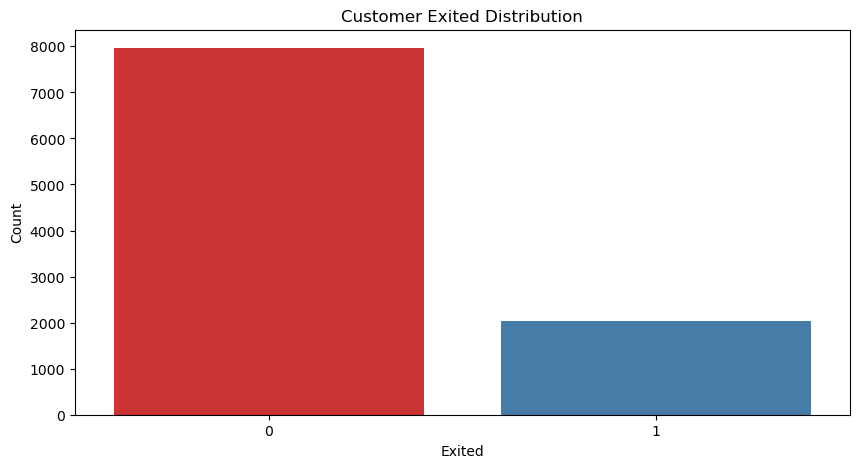

In [9]:
# Visualize the data
plt.figure(figsize=(10, 5))
sns.countplot(x='Exited', hue='Exited', data=df, palette='Set1', legend=False)
plt.title('Customer Exited Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

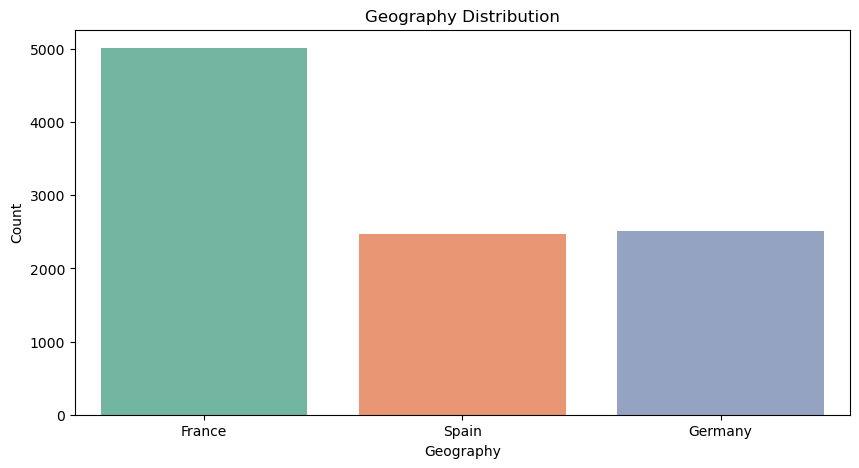

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Geography', hue='Geography', data=df, palette='Set2', legend=False)
plt.title('Geography Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

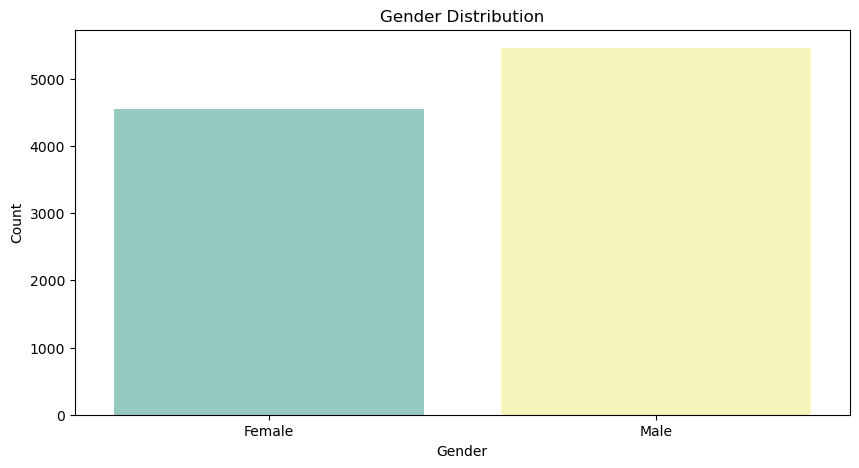

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set3', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

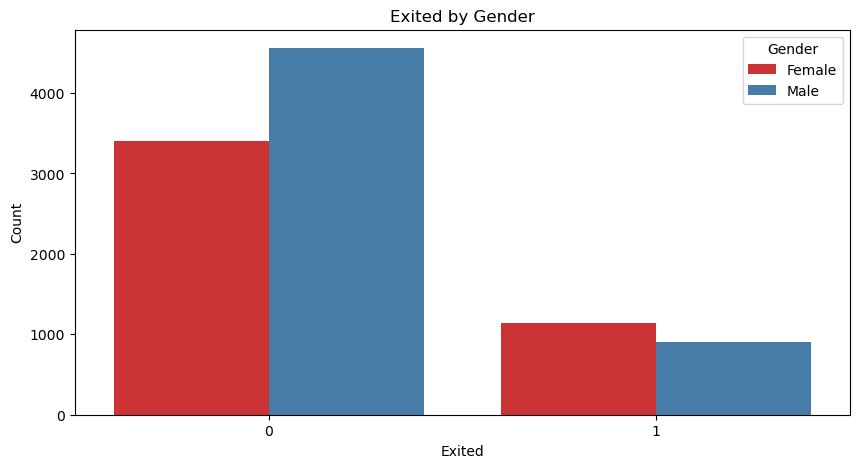

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Exited', hue='Gender', data=df, palette='Set1')
plt.title('Exited by Gender')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

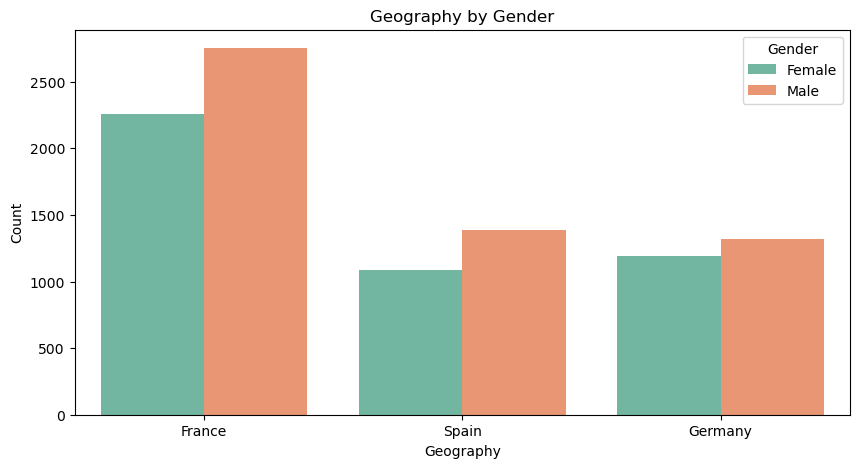

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Geography', hue='Gender', data=df, palette='Set2')
plt.title('Geography by Gender')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

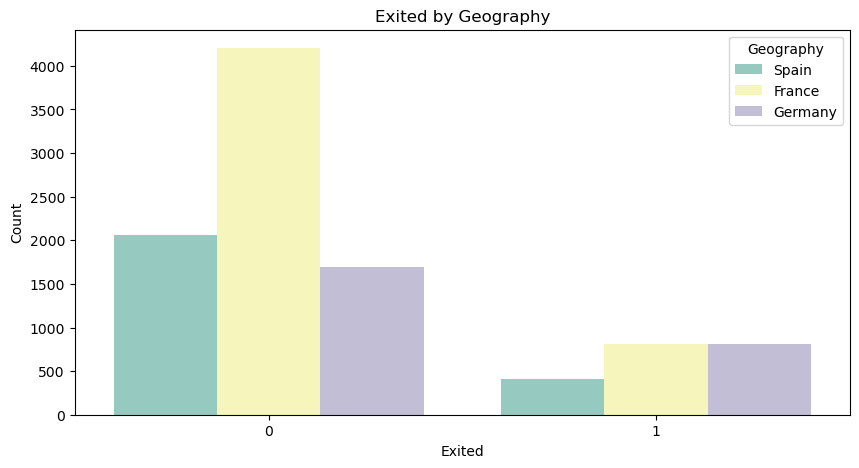

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Exited', hue='Geography', data=df, palette='Set3')
plt.title('Exited by Geography')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [15]:
# Data preprocessing
# Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [17]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Exited', axis=1))

In [18]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Exited'] = df['Exited']

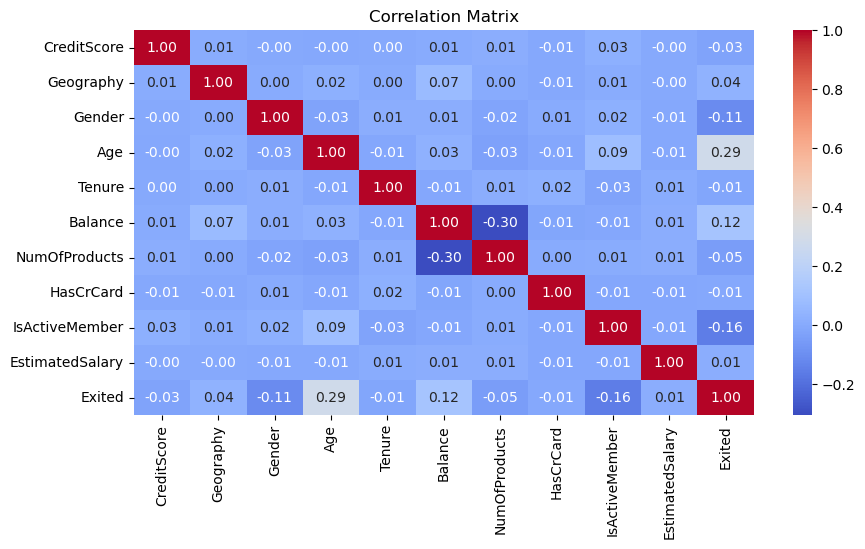

In [19]:
# Display correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Split data into features and target
x = df_scaled.drop(['Exited'], axis=1)
y = df_scaled['Exited']

In [21]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Initialize models
model1 = LogisticRegression(max_iter=500)  # Increased max_iter
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()

In [23]:
# Evaluate Logistic Regression
model1.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [24]:
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred1)

In [25]:
print(f"----- Logistic Regression Evaluation on Test Data -----")
print(f'Accuracy: {accuracy1:.4f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred1))

----- Logistic Regression Evaluation on Test Data -----
Accuracy: 0.8155
Confusion Matrix:
 [[1559   48]
 [ 321   72]]


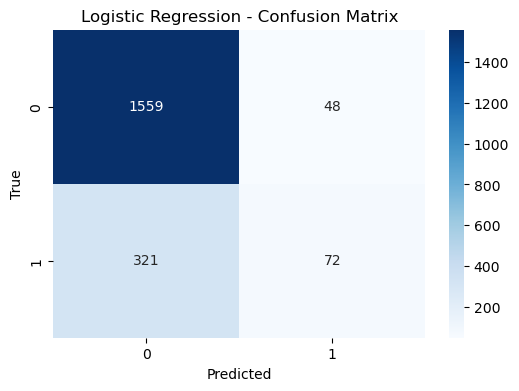

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
print('Classification Report:\n', classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [28]:
# Evaluate Random Forest
model2.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)

In [30]:
print(f"----- Random Forest Evaluation on Test Data -----")
print(f'Accuracy: {accuracy2:.4f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred2))

----- Random Forest Evaluation on Test Data -----
Accuracy: 0.8645
Confusion Matrix:
 [[1547   60]
 [ 211  182]]


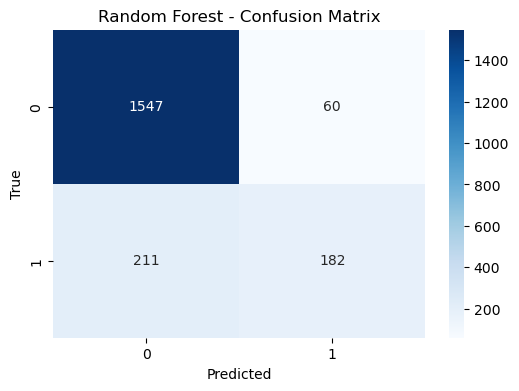

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
print('Classification Report:\n', classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [33]:
# Evaluate Gradient Boosting
model3.fit(x_train, y_train)

GradientBoostingClassifier()

In [34]:
y_pred3 = model3.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred3)

In [35]:
print(f"----- Gradient Boosting Evaluation on Test Data -----")
print(f'Accuracy: {accuracy3:.4f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred3))

----- Gradient Boosting Evaluation on Test Data -----
Accuracy: 0.8655
Confusion Matrix:
 [[1547   60]
 [ 209  184]]


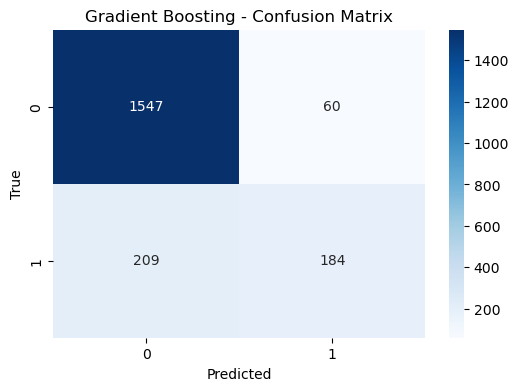

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap='Blues', fmt='d')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
print('Classification Report:\n', classification_report(y_test, y_pred3))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [38]:
# Display results
results_df = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy1, accuracy2, accuracy3]
})

In [39]:
print("Model accuracies:")
print(results_df)

Model accuracies:
             Algorithm  Accuracy
0  Logistic Regression    0.8155
1        Random Forest    0.8645
2    Gradient Boosting    0.8655


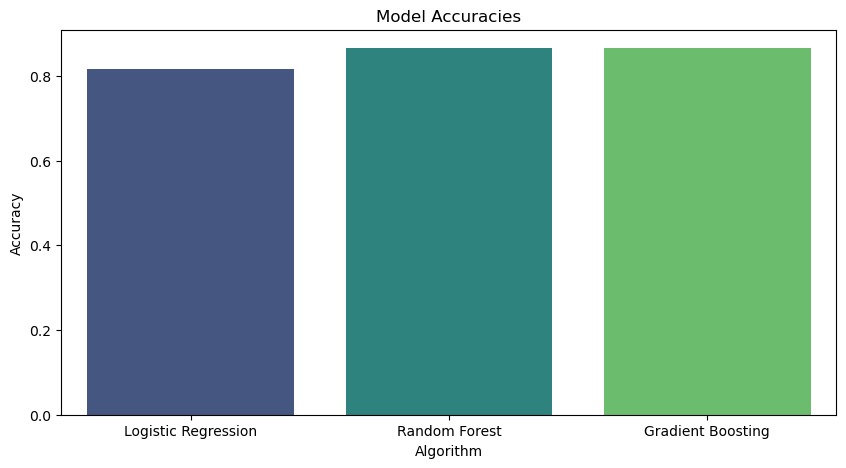

In [40]:
# Plot accuracy results
plt.figure(figsize=(10, 5))
sns.barplot(x='Algorithm', y='Accuracy', hue='Algorithm', data=results_df, palette='viridis', dodge=False, legend=False)
plt.title('Model Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [41]:
# Final model evaluation with Gradient Boosting
final_model = model3
y_pred_final = final_model.predict(x_test)
print(f"Final Gradient Boosting Model Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")

Final Gradient Boosting Model Accuracy: 0.8655


In [42]:
# Determine the best model
best_model_index = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Algorithm']
best_model_accuracy = results_df.loc[best_model_index, 'Accuracy']

In [43]:
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy:.4f}")


Best Model: Gradient Boosting
Accuracy: 0.8655
